In [1]:
import os
import numpy as np
from scipy.cluster.hierarchy import linkage
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_patient = pd.read_table(os.path.join("TCGA-BRCA_MRI.txt"), header=None)
df_patient.columns = ["Patients_id"]
df_patient.head()

,Patients_id
0,TCGA-AO-A03V
1,TCGA-AO-A0J8
2,TCGA-AO-A0J9
3,TCGA-AO-A0JB
4,TCGA-AO-A0JF


In [3]:
df_patient_info = pd.read_table(os.path.join("summaryTableFig1.txt"))
df_patient_info = df_patient_info[["Unnamed: 0", "H2", "H2.norm"]]
df_patient_info.columns = ["Patients_id", "H2", "H2_norm"]
df_patient_info["Patients_id"] = df_patient_info.Patients_id.str.replace(".","-", regex=True)
df_patient_info.head()

,Patients_id,H2,H2_norm
0,TCGA-D8-A1XK,285.150159,0.232403
1,TCGA-A1-A0SO,262.990452,0.741487
2,TCGA-D8-A1XQ,232.332479,0.228409
3,TCGA-BH-A0BZ,220.479492,0.703508
4,TCGA-A8-A08R,217.152082,0.598501


In [4]:
df_features = pd.read_excel(os.path.join("TCGA_Run_2014_91cases_features_UChicago_V2010_MR_Workstation.xls"))
df_features.columns = [column.strip().replace(" ", "_") for column in df_features.columns]
df_features.rename(columns={"Lesion_Name": "Patients_id"}, inplace=True)
df_features["Patients_id"] = df_features.Patients_id.apply(lambda x: "-".join(x.split("-")[:3]))
df_features.head()

,Patients_id,Maximum_enhancement_(K1),Time_to_peak_(K2),Uptake_rate_(K3),Washout_rate_(K4),Curve_shape_index_(K5),E1_(K6),Signal_Enhancement_Ratio_(SER)_(K7),Maximum_enhancement-variance_(E1),Enhancement-Variance_Time_to_Peak_(E2),...,Irregularity_(G2),Margin_Sharpness_(M1),Variance_of_Margin_Sharpness_(M2),Variance_of_Radial_Gradient_Histogram_(vRGH)_(M3),Size/Lesion_volume_(S1),Effective_Diameter_(S2),Surface_Area_(S3),Surface_Area_to_Volume_ratio_(G3),Volume_of_most_enhancing_voxels_(S4),Maximum_Diameter_(S5)
0,TCGA-AO-A03M,1.602573,145.433,0.011019,0.000809,-0.099998,1.550204,1.111109,0.125963,60.000,...,0.642163,0.188643,0.000143,0.014881,3139.6540,18.16747,2897.7040,0.922937,22.15705,27.60382
1,TCGA-AO-A03V,4.072152,144.752,0.028132,0.001510,-0.007311,3.973258,1.007365,4.054312,229.504,...,0.452342,0.266607,0.000371,0.011217,1122.5800,12.89455,953.7904,0.849641,111.70860,21.31066
2,TCGA-AO-A0J9,1.303264,168.383,0.007740,0.000667,-0.146959,1.273733,1.172277,0.534411,60.000,...,0.715572,0.269997,0.000323,0.005211,8211.5000,25.03079,6920.3380,0.842762,236.23630,41.33787
3,TCGA-AO-A0JI,0.758630,60.000,0.012644,0.000479,-0.150482,0.758630,1.177138,0.037956,298.418,...,0.432493,0.179068,0.000407,0.020553,569.5309,10.28426,585.4972,1.028034,122.69640,11.39449
4,TCGA-AO-A0JM,3.353556,60.000,0.055893,0.000920,-0.080066,3.353556,1.087034,2.330160,60.000,...,0.805132,0.314553,0.000409,0.004073,19709.4700,33.51394,18107.5700,0.918724,245.36130,68.62797


In [5]:
df_data = pd.merge(left=df_patient_info, right=df_features,  how="inner")
df_data = pd.merge(left=df_patient, right=df_data,  how="inner")
df_data.set_index("Patients_id", inplace=True)

df_data.head()

,H2,H2_norm,Maximum_enhancement_(K1),Time_to_peak_(K2),Uptake_rate_(K3),Washout_rate_(K4),Curve_shape_index_(K5),E1_(K6),Signal_Enhancement_Ratio_(SER)_(K7),Maximum_enhancement-variance_(E1),...,Irregularity_(G2),Margin_Sharpness_(M1),Variance_of_Margin_Sharpness_(M2),Variance_of_Radial_Gradient_Histogram_(vRGH)_(M3),Size/Lesion_volume_(S1),Effective_Diameter_(S2),Surface_Area_(S3),Surface_Area_to_Volume_ratio_(G3),Volume_of_most_enhancing_voxels_(S4),Maximum_Diameter_(S5)
Patients_id,,,,,,,,,,,,,,,,,,,,,
TCGA-AO-A03V,16.847808,0.238900,4.072152,144.752,0.028132,0.001510,-0.007311,3.973258,1.007365,4.054312,...,0.452342,0.266607,0.000371,0.011217,1122.5800,12.89455,953.7904,0.849641,111.7086,21.31066
TCGA-AO-A0J9,17.685511,0.112585,1.303264,168.383,0.007740,0.000667,-0.146959,1.273733,1.172277,0.534411,...,0.715572,0.269997,0.000323,0.005211,8211.5000,25.03079,6920.3380,0.842762,236.2363,41.33787
TCGA-AO-A0JI,8.209153,0.322895,0.758630,60.000,0.012644,0.000479,-0.150482,0.758630,1.177138,0.037956,...,0.432493,0.179068,0.000407,0.020553,569.5309,10.28426,585.4972,1.028034,122.6964,11.39449
TCGA-AO-A0JM,11.641768,0.191803,3.353556,60.000,0.055893,0.000920,-0.080066,3.353556,1.087034,2.330160,...,0.805132,0.314553,0.000409,0.004073,19709.4700,33.51394,18107.5700,0.918724,245.3613,68.62797
TCGA-AO-A12D,3.732695,0.051385,2.130274,166.000,0.012833,0.000582,0.010644,2.044503,0.989468,0.144247,...,0.602159,0.206223,0.000108,0.010150,7029.4190,23.76696,4460.5470,0.634554,60.4248,31.29810


In [6]:
df_data.to_csv("data.csv")

In [7]:
y = df_data[["H2", "H2_norm"]]
enc_feature = {column: column.split("_(")[-1][0:-1] for column in df_data.iloc[:,2:].columns.tolist()}
X = df_data.drop(columns=["H2", "H2_norm"]).rename(columns=enc_feature)
df_data.rename(columns=enc_feature, inplace=True)


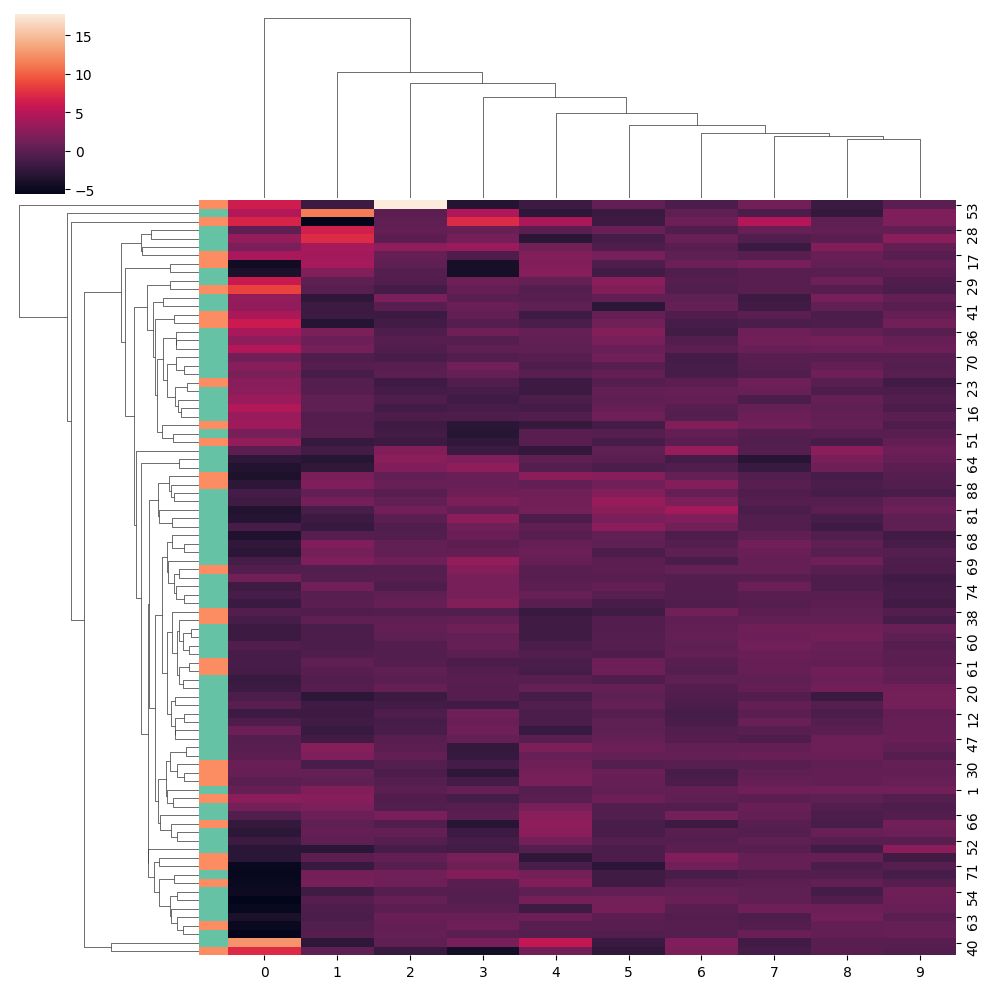

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

std_x = StandardScaler()
pca = PCA(n_components=10)
X_std = std_x.fit_transform(X)
new_X = pca.fit_transform(X_std)

std_y = StandardScaler()
y_std = std_y.fit_transform(y.H2.values.reshape(-1,1)) 
row_colors1 = sns.color_palette("flare", as_cmap=True)(y_std)

y_dis = y.H2.apply(lambda x: 0 if x>y.H2.quantile(.30) else 1)
lut = dict(zip((0,1), sns.color_palette("Set2", 2)))
row_colors2 = y_dis.map(lut).to_numpy()


sns.clustermap(new_X, row_colors=row_colors2)

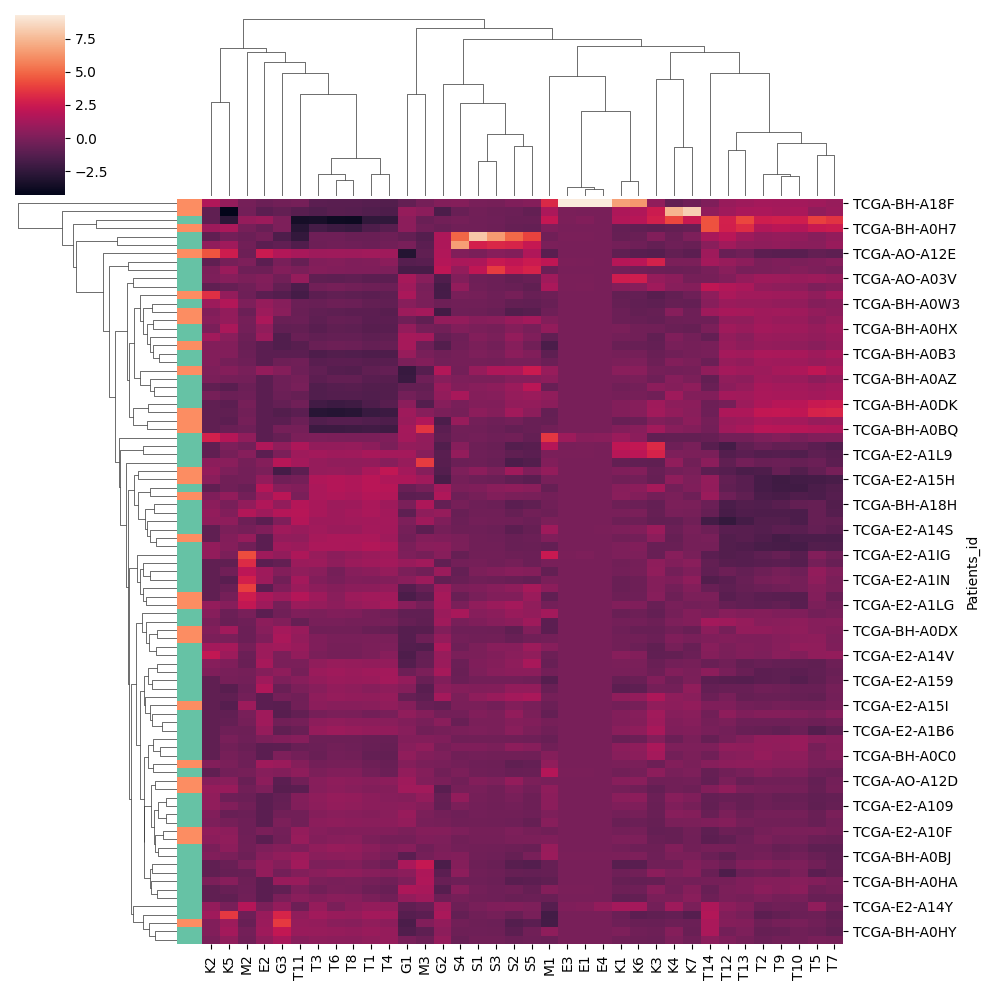

In [9]:
sns.clustermap(X, row_colors=row_colors2, z_score=1)

# Remover features redundantes

[Text(0.5, 1.0, 'Correlação de Spearman')]

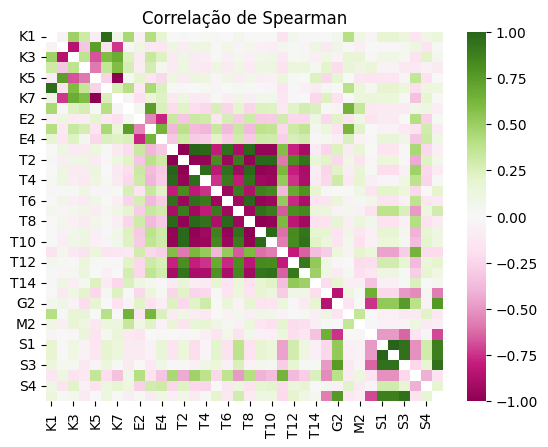

In [10]:
corr = X.corr("spearman").where(~np.identity(X.shape[1]).astype("bool"))
sns.heatmap(corr, vmin=-1, cmap="PiYG").set(title="Correlação de Spearman")

<AxesSubplot: >

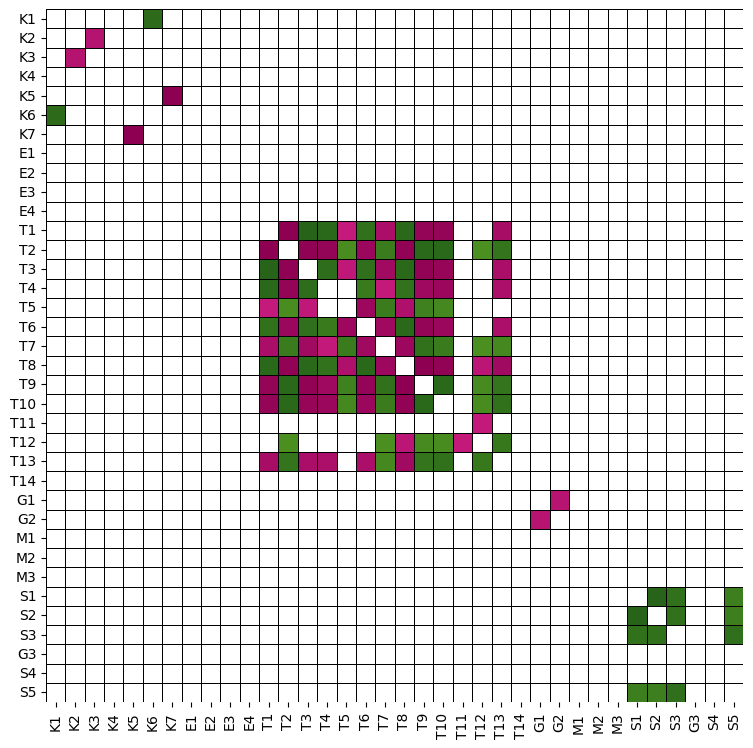

In [11]:
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(corr.where(np.abs(corr)>=.8),
            cmap="PiYG", linecolor="black", linewidth=.5, cbar=False, 
            ax=ax)

In [12]:
rm_features = set(['K6', 'K3', 'K5', 'T2', 'T3', 'T4', 
               'T6', 'T7', 'T8', 'T9', 'T10', 'T13', 
               'T5', 'T12', 'G1', 'S1', 'S3', 'S5', "E1", "E3", "E4"])
X.drop(columns= rm_features, inplace=True)


[Text(0.5, 1.0, 'Correlação de Spearman')]

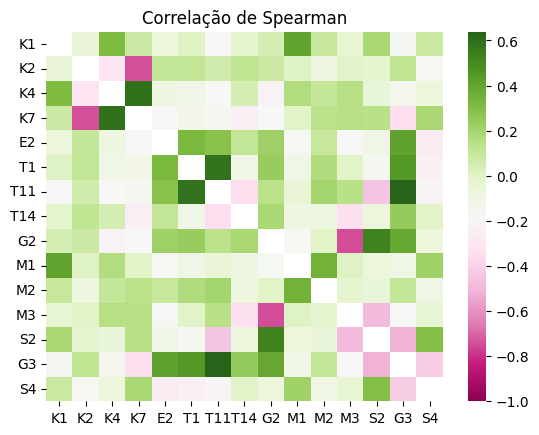

In [13]:
corr = X.corr("spearman").where(~np.identity(X.shape[1]).astype("bool"))
sns.heatmap(corr, vmin=-1, cmap="PiYG").set(title="Correlação de Spearman")

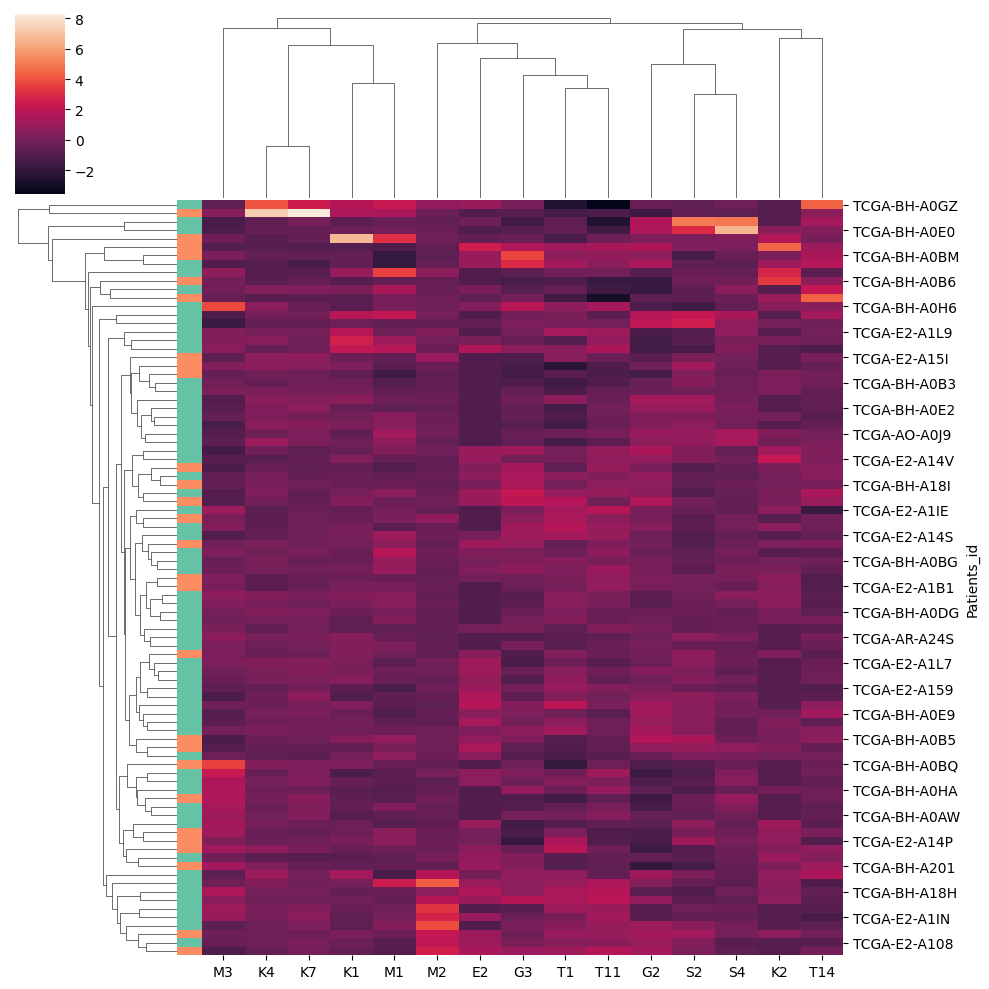

In [14]:
sns.clustermap(X, row_colors=row_colors2, z_score=1)

# Analise Indvidual de Features